# Principal Component Analysis (PCA)

The data might be *redundant* (e.g. one variable may carry similar information as another variable, or that the information covered by a set of variables may overlap) or *noisy* (some dimensions may not carry any useful information and their variation might be due to noise). 


PCA is a way to deal with such situations: it finds a linear orthogonal projection of the data into orthogonal basis (determined by the SVD) with the following properties 
- has the minimum redundancy 
- preserves the variance in the data 

PCA helps us to identify the intrinsic dimensionality of the data  and lower dimensional representation of the data with the smallest reconstruction error. 


<div>
<img src="assets/pca-1.PNG" width="300"/> &nbsp;  <img src="assets/pca-2.PNG" width="295"/> 
<br/>
source: https://www.mathworks.com/help/stats/regress.html
</div>

As can be seen from the figures above, the PCA picks the direction with the largest variance. 

## A Summary of Important Points 

- PCA of a data point cloud in a $d$-dim space ($d$ feature of the data) is computed using SVD of an $N \times d$ matrix $A$ obtained $N$-rows are obtained from the $d$-dim points after centering around the their means. 

- The SVD of matrix $A$ is *essentially* the same as the spectral decomposition of sample covariance matrix of $A^T$, namely $S = \dfrac{1}{N-1} A^T A$.  
 
- The diagonal terms of the covariance matrix are the variances and the large variances indicated "signal". 

- The off-diagonal terms of the covariance matrix are the covariances and the large covariances indicated "high redundancy" in the data which after PCA get eliminated (dimensionality reduction). 

## Applications of SVD/PCA in These Notes 

- Dimensionality Reduction (identify the intrinsic dimensionality of the data)
- Latent Semantic Indexing

## SVD and Covariance Matrices

Recall from probability theory that the *expected value* of a real random variable $x$ is defined by 

$$
\mathbb{E} [x] = \sum_{i} x_i P(x_i)
$$

where $P(x)$ is an abbreviation for the probability $P(x = x_i)$. 

The *conditional* expected value of $x$ is given by 

$$ 
\mathbb{E} [x \mid y] = \sum_{i} x_i P(x_i \mid y)
$$ 

For a function $g$ (of a random variable), 

$$
\mathbb{E} [g(x)] = \sum_{i} g(x_i) P(x_i)
$$

In particular for the function $g(x) = (x - \mathbb{E} (x))^2$ we obtain the *variance*: 

$$
\sigma^2_x = \mathbb{E} \big[ (x - \mathbb{E} (x))^2 \big] =  \mathbb{E}[x^2] - ( \mathbb{E}[x])^2
$$
The last equality above is obtained using the linearity of $ \mathbb{E}$. 

If instead of a probability distribution, we have $N$ sample data points (e.g. results of a trial) then we compute the sample variance instead: 

$$
S^2 = \frac{1}{N-1} \big( (x_1 -m)^2  + \ldots + (x_N - m)^2 \big)
$$

where $m = \frac{1}{N}(x_1 + \ldots + x_N)$ is the average of the data points. 

Often we might be interested in how two or more variables vary together. This brings us to *joint probability distributions*. Given variables $x$ and $y$ the expectation of a function $g(x,y)$ is given by 

$$
\mathbb{E} [g(x,y)] = \sum_{i, j} g(x_i, y_j) P(x_i, y_j)
$$


To quantify how two or more variables vary together, we measure their *covariance*: 

$$
\sigma_{xy} = \mathbb{E} \big[ (x - \mathbb{E} [x]) (y - \mathbb{E} [y]) \big] = \sum_{i} \sum_{j} P(x_i, y_j) (x_i - \mu_x)  (y_j - \mu_y)  
$$

---

#### Example 
Suppose I have two tennis balls, one colored red and one blue. I put them in a box and randomly one of the balls is given to Siegmund and the other one to Sieglinde. Let $x$ be the variable corresponding to the color of the ball Siegmund receives and $y$ be the variable corresponding to the color of the ball Sieglinde receives. We show that, as you can feel in your gut, that $x$ and $y$ are negatively correlated: 
$$
\sigma_{xy} = P(R,R) (0 - 1/2) (0 - 1/2) + P(R,B) (0 - 1/2) (1 - 1/2) + P(B, R) (1 - 1/2) (0 - 1/2)  +  
P(B, B) (1 - 1/2) (1 - 1/2) 
$$

where $P(R,R)$ is shorthand for $P(x = R, y =R)$ and similarly for other terms. Also, note that $P(R,R) = P(B,B) =0 $ since we have only one ball of each color. The way we set up the the distribution of balls lead to $P(R,B) = P(B, R) = 1/2$. 
So, $\sigma_{xy} = -1/4 < 0$. 

---


### The Covariance Matrix 
If we have a number of quantities whose covariances are of interest, you can assemble a covariance matrix. Each entry $σ_{ij}$ is the covariance between variable $x_i$ and the variable $x_j$. Since $σ_{ij}=σ_{ji}$, the covariance matrix is symmetric.

The covariance is normalized to give the *correlation*: 

$$
\rho_{xy} = \dfrac{\sigma_{xy}}{\sigma_x \sigma_y}  
$$

and the *regression* coefficients: 

$$
r_{xy} = \rho_{xy} \, \dfrac{\sigma_{x}}{\sigma_y}
$$


And the *conditional correlation coefficients* are defined using the conditional distribution $P(x,y \mid z)$:

$$
\rho_{x y\mid z} = \dfrac{\sigma_{xy \mid z}}{(\sigma_{x \mid z}) \, (\sigma_{y \mid z})}
$$



Suppose $X$ is a vector of random variables, e.g. 

$$ 
\begin{bmatrix}
\text{age} \\ 
\text{height} \\ 
\text{weight} \\
\end{bmatrix}
$$

In what follows we are just gonna consider $X$ to be a 3-dimensional vector for notational convenience but everything we say wil equally work well for arbitrary dimensions. So, let's write $X = (x, y , z)^T$ where $x, y, z$ are random variables possibly correlated. 

The covariance matrix of $X$ is given by the following sum of rank-one matrices
$$
V = \mathbb{E} \big[  (X - \overline{X}) (X - \overline{X})^T \big] = \sum_{ij} p_{ij} (X - \overline{X}) (X - \overline{X})^T
$$
where $\overline{X}$ is a column vector of the same size as $X$ whose entries are means (e.g. $m_\text{age}$, $m_\text{height}$, $m_{\text{weight}}$), and $p_{ij} = P(x_i , x_j)$. Let's calculate the entries of the $3 \times 3$ covariance matrix: 

$$
V = 
\begin{bmatrix}
 \sigma^2_x & \mathbb{E}[(x - \mu_x ) \, (y - \mu_y)] & \mathbb{E}[ (x - \mu_x ) \, (z - \mu_z) ]  \\
 \\
 \mathbb{E}[ (y - \mu_y) \, (x - \mu_x )] & \sigma^2_y &  \mathbb{E}[ (y - \mu_y) \, (z - \mu_z ) ] \\
 \\
\mathbb{E}[(x - \mu_x ) \, (z - \mu_z)] & \mathbb{E}[(y - \mu_y ) \, (z - \mu_z)] & \sigma^2_z 
\end{bmatrix}.
$$

Therefore, the covariance matrix is a square matrix whose $ij$ entry $V_{i,j} = \sigma(x_i, x_j)$ where $\sigma(x_i, x_j)$ is the covariance of the variable $x_i$ with the variable $x_j$ and $\sigma(x_i, x_i) = \sigma^2 (x_i)$ is the variance of the $i$-th variable $x_i$.  We remark that if the variables $x$ and $y$ are independent, then their covariance $\sigma_{xy} = \mathbb{E}[(x - \mu_x ) \, (y - \mu_y)]$ is zero since 

For instance if we only have two variables $x$ and $y$, 

$$ 
V = \begin{bmatrix} 
\sigma(x,x)  & \sigma(x, y)   \\ 
\sigma(y,x) & \sigma(y,y) \\
\end{bmatrix}
$$

The **sample covariance matrix** is the discrete version of the general formula above for a sample of empirical observations: 

$$S = \frac{1}{N-1} \sum^{N}_{i=1}{(X_i-\bar{X})(X_i-\bar{X})^T}$$ 

Let's calculate the entries of the $3 \times 3$ sample covariance matrix for $N$ samples (i.e. $N$ three-dimensional vectors $(\text{age}_j, \text{height}_j, {\text{weight}}_j)^T$ where $1 \le j \le N$.): 

$$
S = \dfrac{1}{N-1} 
\begin{bmatrix}
 \langle x - m_x, x - m_x \rangle & \langle x - m_x, y - m_y \rangle & \langle x - m_x, z - m_z \rangle  \\
 \\
 \langle x - m_x, y - m_y \rangle &  \langle y - m_y, y - m_y \rangle &   \langle y - m_y, z - m_z \rangle  \\
 \\
\langle x - m_x, z - m_z \rangle & \langle y - m_y, z - m_z \rangle & \langle z - m_z, z - m_z \rangle
\end{bmatrix}
$$

And the inner products in the entries can be unfolded if we wish: 

$$
S = \dfrac{1}{N-1} 
\begin{bmatrix}
 \sum_j (x_j - m_x)^2 & \sum_{j}(x_j - m_x ) \, (y_j - m_y) & \sum_{j}(x_j - m_x ) \, (z_j - m_z)  \\
 \\
 \sum_{j}(x_j - m_x ) \, (y_j - m_y) & \sum_j (y_j - m_y)^2  &  \sum_{j} (y_j - \mu_y) \, (z_j - \mu_z )  \\
 \\
\sum_{j}(x_j - m_x ) \, (z_j - m_z) & \sum_{j} (y_j - \mu_y) \, (z_j - \mu_z ) & \sum_j (y_j - m_y)^2
\end{bmatrix}.
$$

The **total variance** of the data is given by the trace of $S$. Note the conceptual difference between $V$ and $S$ is fundamental: $V$ is computed from the expected valued of a joint probability distribution (e.g. expected values from a future trial) whereas $S$ is computed from the sample values (e.g. of a survey or a past trial). 


#### The Covariance Matrix of Linear Combination of Variables

Consider a linear combination $c_1 x + c_2 y + c_3 z$ of variables $x$, $y$, $z$, for instance the new variable $ \text{age} + 3 \times \text{height} - 1.5 \times \text{weight} $. We have 

$$
c_1 x + c_2 y + c_3 z = \mathbf{c}^T \, X
$$
where $\mathbf{c}^T = (c_1, c_2, c_3)$. We note that 

$$
\mathbb{E}[\mathbf{c}^T \, X] = \mathbf{c}^T \, \mathbb{E}[X] 
$$
by the linearity of the expected value. This means the expected value of the new variable $ \text{age} + 3 \times \text{height} - 1.5 \times \text{weight} $ is 
$$
\mathbb{E}[\textbf{age}] + 3 \, \mathbb{E}[\textbf{height}] - 1.5 \, \mathbb{E}[\textbf{weight}] 
$$


Since $\mathbf{c}^T \, X$ is a single variable we expect its variance to be a number; Using linearity of we can actually calculate this number in terms of covariance matrix $V$ of the vector of variables $X$: 

$$
\text{variance of } \, \mathbf{c}^T \, X  \, = \sigma_{\mathbf{c}^T  X}^2 = \mathbb{E}\big[(\mathbf{c}^T X  - \mathbf{c}^T \overline{X}) (\mathbf{c}^T X  - \mathbf{c}^T \overline{X})^T \big] = \mathbf{c}^T \, V \mathbf{c}
$$
which is the inner product $\langle \mathbf{c}^T , V \mathbf{c} \rangle$.  

Note that if the variables $x, y , z$ are *mutually independent*, then $V$ is a diagonal matrix and therefore, the variance of $\mathbf{c}^T \, X$ is equal to $c_1^2 \sigma^2_x + c_2^2 \sigma^2_y + c_3^2 \sigma^2_z $. Further, if the variances of all variables are $1$ then the covariance matrix $V$ is the identity matrix and the variance of $\mathbf{c}^T \, X$ is equal to $\langle \mathbf{c}^T ,  \mathbf{c} \rangle = \| c \|^2$. We'll see later that the quotient 
$$
\dfrac{\text{variance of } \mathbf{c}^T X}{\|c\|^2} = \dfrac{c_1^2 \sigma^2_x + c_2^2 \sigma^2_y + c_3^2 \sigma^2_z}{c_1^2 + c_2^2 + c_3^2 }
$$
is of particular importance. 


**Challenge:** Think about for which linear combination this value is maximized. Your answer should be a condition on $\mathbf{c}$. 

---
### Example 
Consider the vector $X$ of random variables height (h) and weight (w). Define a new variable $z = h + w$. We have $z = \mathbf{c}^T X$ where $\mathbf{c}^T = (1, 1)$. Therefore, the variance of $z = \mathbf{c}^T X$ is given by   
$$
\mathbf{c}^T \, V \mathbf{c} = 
\begin{bmatrix} 
1 & 1 
\end{bmatrix} 
\begin{bmatrix} 
\sigma^2_h & \sigma_{hw} \\ 
\sigma_{hw} & \sigma^2_w 
\end{bmatrix}
\begin{bmatrix} 
1 \\ 
1 
\end{bmatrix}
= 
\begin{bmatrix} 
1 & 1 
\end{bmatrix} 
\begin{bmatrix} 
\sigma^2_h + \sigma_{hw} \\ 
\sigma_{hw} + \sigma^2_w 
\end{bmatrix}
= 
\sigma^2_h + 2 \sigma_{hw} + \sigma^2_w  
$$
Since height and weight tend to be positively correlated the variance of the new variable $h + w$ is larger than the variances in height and weight combined.

---

In the example above, we could include $h$ and $w$ themselves as obvious linear combinations of $h$ and $w$ into a vector of variables: 
$$
Z = 
\begin{bmatrix}
h \\ 
w \\
h + w \\ 
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0  \\ 
0 & 1 \\
1 & 1 \\ 
\end{bmatrix}
\begin{bmatrix}
h \\ 
w \\
\end{bmatrix}
$$

Again, we can prove, by the linearity of $\mathbb{E}$, that for any matrix $A$ 
$$
\mathbb{E}[AX] = A \, \mathbb{E}[X]
$$
and with more patience that 
$$
V_{AX} = A \, V_X A^T 
$$
where $V_{AX}$ is the covariance matrix of $A\, X$. Therefore, 
$$ 
V_Z = 
\begin{bmatrix}
1 & 0  \\ 
0 & 1 \\
1 & 1 \\ 
\end{bmatrix}
\begin{bmatrix} 
\sigma^2_h & \sigma_{hw} \\ 
\sigma_{hw} & \sigma^2_w 
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 1 \\ 
0 & 1 & 1
\end{bmatrix}
$$ 
which is calculated to 
$$
\begin{bmatrix} 
\sigma^2_h & \sigma_{hw} & \sigma_h^2 + \sigma_{hw} \\ 
\sigma_{hw} & \sigma^2_w & \sigma_w^2 + \sigma_{hw} \\
\sigma^2_h + \sigma_{hw} & \sigma^2_w + + \sigma_{hw} & \sigma^2_h + \sigma_w^2 + 2 \sigma_{hw} \\
\end{bmatrix}
$$

Note that the $3 \times 3$ matrix $V_Z$ is singular: its rank is $2$. 

In the following example we visualize two random variables $x$ and $y$ with mean values $0$ and unit variance. 

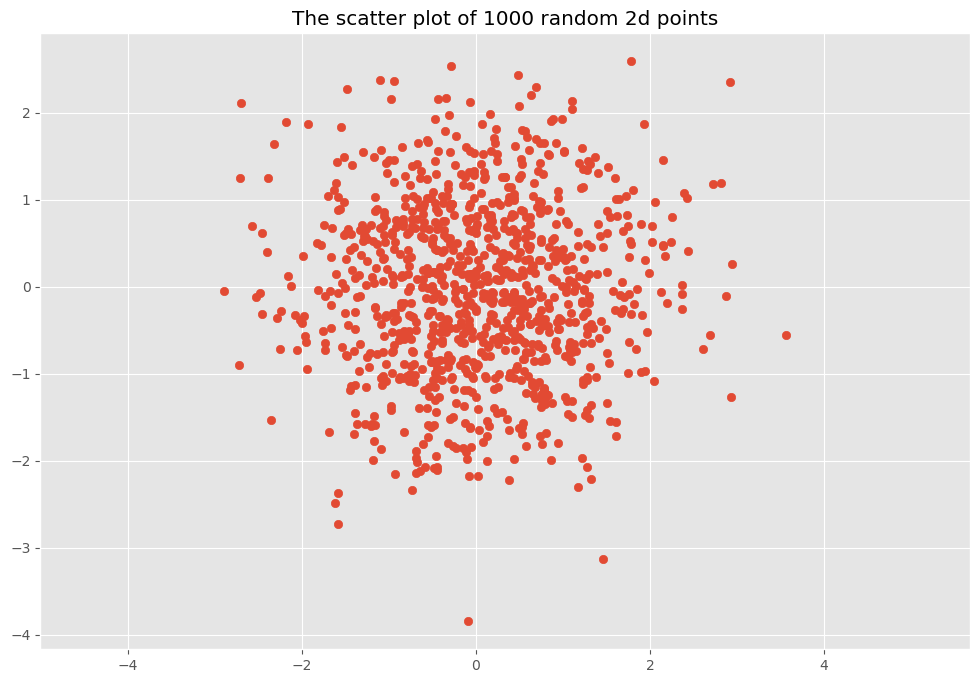

In [143]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
X = np.vstack((x, y)).T


# print(X[:,0])

plt.scatter(X[:, 0], X[:, 1])
plt.title('The scatter plot of 1000 random 2d points')
plt.axis('equal');

In this example  variables $x$ and $y$ are independent (so for large samples $\sigma_{xy}$ tends to $0$) and the covariance matrix is simply the diagonal matrix 
$$
V = \begin{bmatrix} 
\sigma^2_x  & 0   \\ 
0 & \sigma^2_y \\
\end{bmatrix}
$$

In [144]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) 

array([[1.01823047, 0.0192105 ],
       [0.0192105 , 0.97178368]])

Or we could use the covariance function in Python directly which results in the same $2 \times 2$ matrix: 

In [145]:
np.cov(X.T)

array([[1.01823047, 0.0192105 ],
       [0.0192105 , 0.97178368]])

Say we have a diagonal matrix 
$$
D = 
\begin{bmatrix}
d_1 & 0 \\ 
0 & d_2 \\ 
\end{bmatrix}
$$
What happens to the shape of the data above if transform our vector variables $X = (x,y)^T$ with the matrix $D$. From our theoretical discussion before we know that 
$$
V_{DX} = D V_X D^T  = D^2 V_X =  
\begin{bmatrix}
d_1^2 \sigma^2_x & 0 \\ 
0 & d_2 ^2 \sigma^2_y \\ 
\end{bmatrix} = 
\begin{bmatrix}
d_1^2  & 0 \\ 
0 & d_2 ^2  \\ 
\end{bmatrix}
\, .
$$ 
This means that the variances are scaled by the $d_1^2$ and $d_2^2$. 

array([[0.25455762, 0.02881575],
       [0.02881575, 8.74605316]])

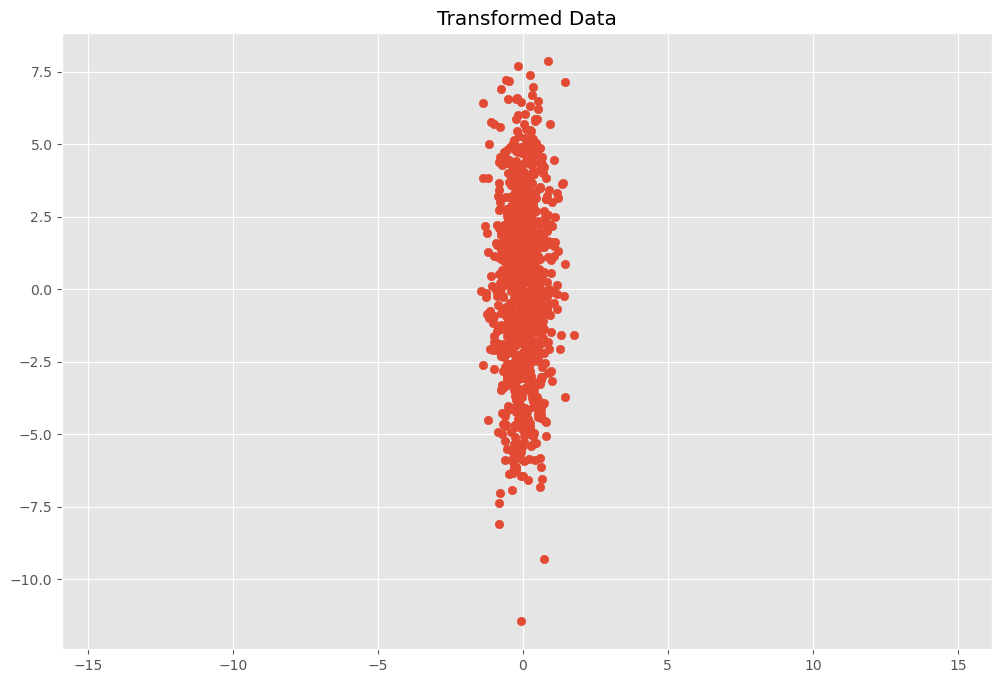

In [146]:
# Center the matrix at the origin
X = X - np.mean(X, 0) # this actually does nothing ... our data has mean 0 already 

# print(X)

# Scaling matrix
dx, dy = 0.5, 3
D = np.array([[dx, 0], [0, dy]])

# Apply scaling matrix to X
Y = X.dot(D)



plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
np.cov(Y.T)

This is the plot of variable $x' = d_1 x$ and $y' = d_2 y$. Compared to the variance of variables $x$ and $y$, we see that the variance of $x'$ is much smaller than that of $x$ (by factor of $1/4$) and the variance of $y'$ is much larger than that of $y$ (by factor of 9). 

What if we used a rotation matrix $R$ after the diagonal matrix $D$? Let's consider the effect of transformation of the data by the rotation matrix 
$$
R_\theta = 
\begin{bmatrix}
cos \, \theta & - sin \, \theta \\ 
sin \, \theta & cos \, \theta 
\end{bmatrix}
$$
where $\theta$ is the rotation angle. 

array([[ 6.59823957, -3.69132452],
       [-3.69132452,  2.40237121]])

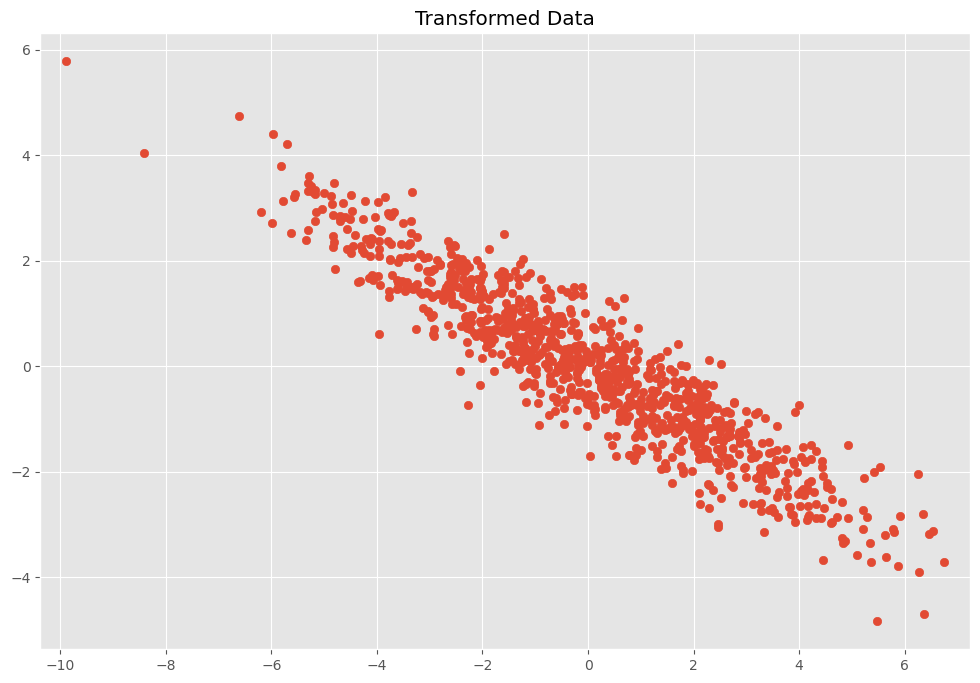

In [147]:
# Rotation matrix
theta = 0.666666*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Apply transformation matrix to X
Z = Y.dot(Rot)

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
np.cov(Z.T)

Interesting! Now we have negative correlations between $x$ and $y$. How do you explain this? 

## PCA and Eigenvalues of Covariance Matrix


Principal component analysis is a direct application of SVD. As we shall see it turns out that PCA is mathematically equivalent to finding the eigenvectors and eigenvalues of the covariance matrix. 

Since the covariance matrix is symmetric, the Spectral Theorem will tell us that when all the eigenvalues are distinct, the eigenvectors are actually all orthogonal.

### A Simple Example 

Suppose we have measured the height and weight of 7 students on campus and we arrange the measurements into a $6 \times 2$ matrix $A_0$ whose two columns represent the ages and heights (in cm). The 6 rows corresponds to the number of students in our sample. 

$$
A_0 = \begin{bmatrix}
24  & 181 \\
17 &  168  \\ 
28 & 182 \\ 
22 & 173 \\ 
17 & 173 \\ 
18 & 167 \\  
\end{bmatrix}
$$



First, we center the matrix around the mean of the columns (i.e. subtract the mean of each column from the entries of that column). The centered matrix $A$ has two columns each of which has mean $0$. The mean of the first column is $21$ and the mean of the second column is $174$. 

$$
A = 
\begin{bmatrix}
24 - 21 & 181 -174 \\
17 -21 &  168  -174\\ 
28 - 21 & 182 -174\\ 
22 - 21 & 173 -174\\ 
17 - 21 & 173 -174\\ 
18 - 21 & 167 -174 \\  
\end{bmatrix}
= 
\begin{bmatrix}
\, 3 & \, 7 \\
-4  &  -6 \\ 
\, 7 & \, 8  \\ 
\, 1 & -1 \\ 
-4 & -1 \\ 
-3 & \, -7 \\  
\end{bmatrix}
$$

Sometimes we use the concise notation $A_0 - \overline{A_0}$ for the centered matrix $A$. In this example 

$$
\overline{A_0} = 
\begin{bmatrix}
21 & 174 \\
21  & 174 \\ 
21 & 174  \\ 
21 & 174 \\ 
21 & 174 \\ 
21 & 174 \\  
\end{bmatrix}
$$


In [148]:
A_zero = np.array([[24,181], [17, 168], [28, 182], [22,173], [17,173], [18,167]])
A = A_zero - np.mean(A_zero,0)

print(A)

[[ 3.  7.]
 [-4. -6.]
 [ 7.  8.]
 [ 1. -1.]
 [-4. -1.]
 [-3. -7.]]


The first right singular vector of $A$ finds the best line through $(0,0)^T$ near which the data is **clustered**. The first right singular vector $v_1$ is the eigenvector of the of the $2 \times 2$ symmetric matrix $A^T A = A^T (A^T)^T$ corresponding to the largest eigenvalue. This vector is the same as the first eigenvector of the the sample covariance matrix of $A^T$, i.e. 
$$
S = V_{A^T} = \dfrac{1}{6-1} A^T (A^T)^T =  \dfrac{1}{6-1} A^T A
$$

Observe that 

$$
A^T = 
\begin{bmatrix}
3 & -4 & 7 & \, 1 & -4 & -3   \\
7 & -6 & 8 & -1 & -1 & \, 7  
\end{bmatrix}
$$

and therefore, 

$$
S = 
\begin{bmatrix}
20 & 25 \\ 
25 & 40 
\end{bmatrix}
$$

In [149]:
A.T @ A

array([[100., 125.],
       [125., 200.]])

In [150]:
S = np.cov(A.T)

print(S)

[[20. 25.]
 [25. 40.]]


In [151]:
np.linalg.eig(S)[0]

array([ 3.07417596, 56.92582404])

In [152]:
np.linalg.eig(S)[1]

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [153]:
v = np.linalg.eig(S)[1][:,1]

print ("v1: " , v)

v1:  [-0.56062881 -0.82806723]


Therefore $S$ has eigenvalues near $57$ and $3$ and their sum equal the trace of $S$, i.e. $20 + 40 = 60$. The vector $v$, which is the direction of the closest line in the scatter plot, tell us all we need to know about the data that is *where the maximum variance is located and the direction around which most data is clustered around*. We reduced a 2-dimensional data to the best 1-dim approximation. 

In [154]:
U, D, VT = np.linalg.svd(A)

print ("\n D:")
print (D)

print ("\n U:")
print (U)

print ("\n V:")
print (VT.T)


 D:
[16.87095493  3.92057136]

 U:
[[-0.44326815 -0.36734441 -0.36309993  0.23690007 -0.27380015  0.63690007]
 [ 0.42741615  0.01313684  0.48968753  0.30507214 -0.67168275  0.18199522]
 [-0.62527222  0.3345023   0.66162751 -0.01529556  0.13828344  0.20008905]
 [ 0.015852    0.35420757 -0.17078791  0.87536594  0.26465274 -0.09386483]
 [ 0.18200407 -0.70184671  0.39743734  0.21282195  0.51281763  0.08974503]
 [ 0.44326815  0.36734441 -0.05906485 -0.19752639  0.34889894  0.71016592]]

 V:
[[-0.56062881  0.82806723]
 [-0.82806723 -0.56062881]]


In [155]:
v1 = VT.T[ : , 0]
v2 = VT.T[ : , 1]

print ("v1: " , v1)
print("v2: ",  v2)

print (v1[0]/v1[1])

v1:  [-0.56062881 -0.82806723]
v2:  [ 0.82806723 -0.56062881]
0.6770329614269007


We observe that the first singular value is about $\sqrt{5} \times \sqrt{57}$, and the first singular vector is roughly $(0.6, 0.8)^T$. The first rank one piece of $S$ is about $\sqrt{5}\sqrt{57} u_1 v_1^T$. The second ank one piece of $S$ is $\sqrt{5}\sqrt{3} u_2 v_2^T$ much smaller than the first one and therefore can be ignored. The closest line in the scatter plot has the slope $8/6$. This line is in fact given by the formula 

$$
\begin{bmatrix}
21 \\ 
174 
\end{bmatrix}
+ 
\begin{bmatrix}
\, x \\ 
\frac{8}{6} \, x 
\end{bmatrix}
$$

As we discussed in the previous lecture on SVD, this is the line which makes the sum of squares of perpendicular distances the least. 

Recall from the Eckart-Young theorem the $k$-truncation of a matrix. What is the 1-truncation of the matrix $A$ in above? 

In [156]:
def svd_trunc (matrix, level) : 
    U, S, VT = np.linalg.svd(matrix)
    matrix = U[:,:level] @ np.diag(S[:level]) @ VT[:level,:]
    
    return matrix

A_1 = svd_trunc(A, 1) 

print (A_1)

[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


What is the meaning of this matrix? 

# PCA and Dimensionality Reduction of High-dimensional Data

In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
X.shape

(1083, 64)

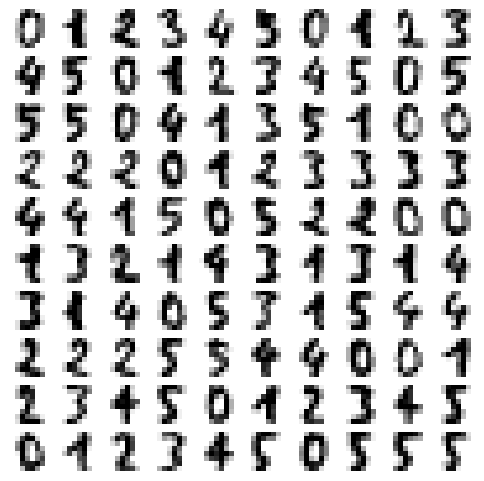

In [159]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

plt.show()

In [160]:
# Helper
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

def plot_embedding(X):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.axis("off")
    plt.show()

## PCA

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X)
Xt.shape

(1083, 2)

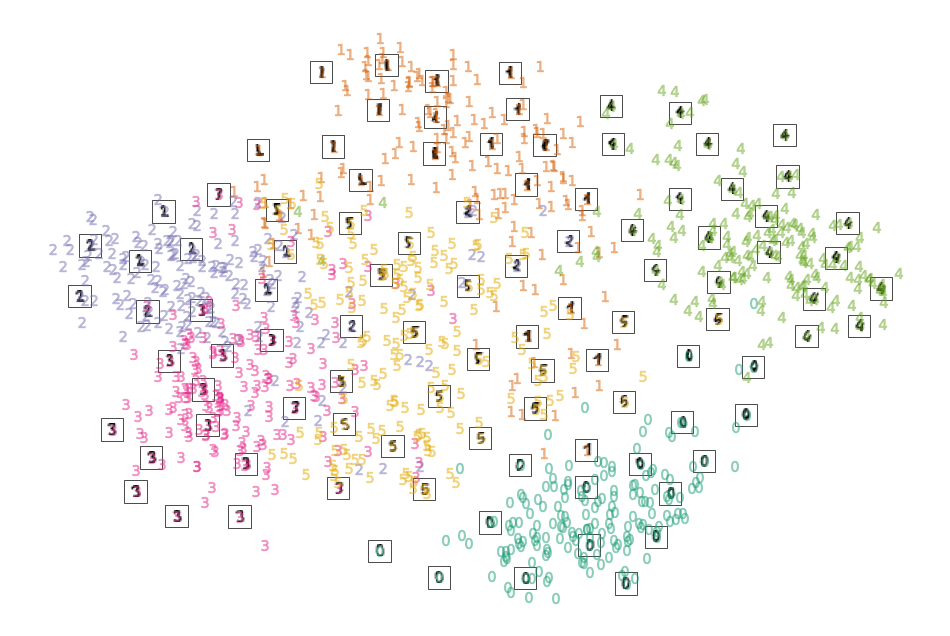

In [162]:
plot_embedding(Xt)

## t-SNE

In [163]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init="pca", learning_rate="auto")
Xt = tsne.fit_transform(X)
Xt.shape

(1083, 2)

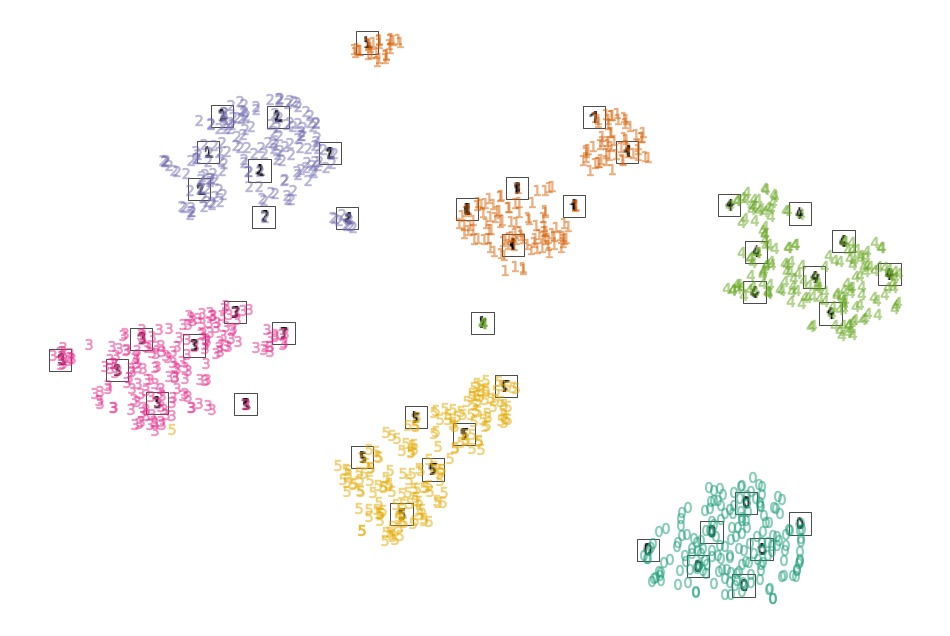

In [164]:
plot_embedding(Xt)

See also [Wattenberg et al, 2016](https://distill.pub/2016/misread-tsne/) on how to use t-SNE effectively.